<h1 style="color:rgb(0,120,170)">Neural Networks and Deep Learning</h1>
<h2 style="color:rgb(0,120,170)">Vanishing Gradient</h2>

This notebook is a visualization of the famous Vanishing Gradient problem. It should foster your understanding of what happens to the weights in the different layers. If you want to further stretch the topic you can try to implement different activation functions.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
from torchvision import datasets, transforms
from types import SimpleNamespace
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print(torch.__version__)
print(torch.cuda.is_available())

1.7.1
True


In [3]:
# Hyperparameters
args = SimpleNamespace(batch_size=64, test_batch_size=1000, epochs=1,
                       lr=0.01, momentum=0.5, seed=1, log_interval=100)
torch.manual_seed(args.seed)
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')

In [4]:
# Data loader (downloads data automatically the first time)
# 0.1307 and 0.3081 are the mean and the std computed on the training set
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(os.path.join('.','..','data'), train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=args.batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST(os.path.join('.','..','data'), train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
        batch_size=args.test_batch_size, shuffle=True, **kwargs)

torch.Size([60000])
torch.Size([60000, 28, 28])
Input dimension is 784.


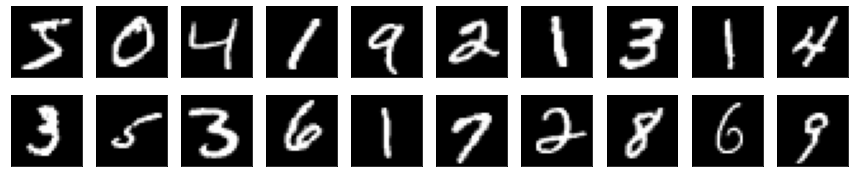

In [5]:
print(train_loader.dataset.targets.shape)
print(train_loader.dataset.data.shape)
input_dim = train_loader.dataset.data.shape[1]*train_loader.dataset.data.shape[2]
print("Input dimension is {}.".format(input_dim))
output_dim = 10

# Plot example images
fig=plt.figure(figsize=(15,3))
for image in range(20):
    show_img = train_loader.dataset.data[image].numpy().reshape(28, 28)
    fig.add_subplot(2,10,image+1)
    plt.xticks([]),plt.yticks([])
    plt.imshow(show_img, cmap='gray')
plt.show()

Two network modules are defined. Both have 3 hidden layers with the same size of neurons. The only difference is the activation functions. The sigmoid activation function will cause the gradients to vanish.

In [6]:
class ANN_sigmoid(nn.Module):
    def __init__(self, D_in, D_out):
        super(ANN_sigmoid, self).__init__()
        self.linear1 = nn.Linear(D_in, 512)
        self.linear2 = nn.Linear(512, 1024)
        self.linear3 = nn.Linear(1024, 1024)
        self.linear4 = nn.Linear(1024, 1024)
        self.linear5 = nn.Linear(1024, 1024)
        self.linear6 = nn.Linear(1024, 1024)
        self.linear7 = nn.Linear(1024, 1024)
        self.linear8 = nn.Linear(1024, 512)
        self.linear9 = nn.Linear(512, D_out)

    def forward(self, x):
        activation_function = torch.sigmoid
        x = self.linear1(x)
        x = activation_function(x)
        x = self.linear2(x)
        x = activation_function(x)
        x = self.linear3(x)
        x = activation_function(x)
        x = self.linear4(x)
        x = activation_function(x)
        x = self.linear5(x)
        x = activation_function(x)
        x = self.linear6(x)
        x = activation_function(x)
        x = self.linear7(x)
        x = activation_function(x)
        x = self.linear8(x)
        x = activation_function(x)
        x = self.linear9(x)
        return F.log_softmax(x, dim=1)
    
    
class ANN_relu(nn.Module):
    def __init__(self, D_in, D_out):
        super(ANN_relu, self).__init__()
        self.linear1 = nn.Linear(D_in, 512)
        self.linear2 = nn.Linear(512, 1024)
        self.linear3 = nn.Linear(1024, 1024)
        self.linear4 = nn.Linear(1024, 1024)
        self.linear5 = nn.Linear(1024, 1024)
        self.linear6 = nn.Linear(1024, 1024)
        self.linear7 = nn.Linear(1024, 1024)
        self.linear8 = nn.Linear(1024, 512)
        self.linear9 = nn.Linear(512, D_out)


    def forward(self, x):
        activation_function = torch.relu
        x = self.linear1(x)
        x = activation_function(x)
        x = self.linear2(x)
        x = activation_function(x)
        x = self.linear3(x)
        x = activation_function(x)
        x = self.linear4(x)
        x = activation_function(x)
        x = self.linear5(x)
        x = activation_function(x)
        x = self.linear6(x)
        x = activation_function(x)
        x = self.linear7(x)
        x = activation_function(x)
        x = self.linear8(x)
        x = activation_function(x)
        x = self.linear9(x)
        return F.log_softmax(x, dim=1)
    
    
class ANN_selu(nn.Module):
    def __init__(self, D_in, D_out):
        super(ANN_selu, self).__init__()
        self.linear1 = nn.Linear(D_in, 512)
        self.linear2 = nn.Linear(512, 1024)
        self.linear3 = nn.Linear(1024, 1024)
        self.linear4 = nn.Linear(1024, 1024)
        self.linear5 = nn.Linear(1024, 1024)
        self.linear6 = nn.Linear(1024, 1024)
        self.linear7 = nn.Linear(1024, 1024)
        self.linear8 = nn.Linear(1024, 512)
        self.linear9 = nn.Linear(512, D_out)
        
#         # Correct selu initialization: normal distribution with mean=0, var = 1/n_weights
#         # Usually this should work better but it can change the learning behavior and
#         # sometimes requires re-adjustment of learning rates. So we use the "wrong"
#         # initialization we used for sigmoid/relu instead.
#         torch.nn.init.normal_(self.linear1.weight, mean=0, std=np.sqrt(1/(D_in*512)))
#         torch.nn.init.normal_(self.linear2.weight, mean=0, std=np.sqrt(1/(512*1024)))
#         torch.nn.init.normal_(self.linear3.weight, mean=0, std=np.sqrt(1/(1024*1024)))
#         torch.nn.init.normal_(self.linear4.weight, mean=0, std=np.sqrt(1/(1024*1024)))
#         torch.nn.init.normal_(self.linear5.weight, mean=0, std=np.sqrt(1/(1024*1024)))
#         torch.nn.init.normal_(self.linear6.weight, mean=0, std=np.sqrt(1/(1024*1024)))
#         torch.nn.init.normal_(self.linear7.weight, mean=0, std=np.sqrt(1/(1024*1024)))
#         torch.nn.init.normal_(self.linear8.weight, mean=0, std=np.sqrt(1/(1024*512)))
#         torch.nn.init.normal_(self.linear9.weight, mean=0, std=np.sqrt(1/(512*D_out)))


    def forward(self, x):
        activation_function = torch.selu
        x = self.linear1(x)
        x = activation_function(x)
        x = self.linear2(x)
        x = activation_function(x)
        x = self.linear3(x)
        x = activation_function(x)
        x = self.linear4(x)
        x = activation_function(x)
        x = self.linear5(x)
        x = activation_function(x)
        x = self.linear6(x)
        x = activation_function(x)
        x = self.linear7(x)
        x = activation_function(x)
        x = self.linear8(x)
        x = activation_function(x)
        x = self.linear9(x)
        return F.log_softmax(x, dim=1)

In [7]:
# This function trains the model for one epoch
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    grads1_list = []
    grads2_list = []
    grads3_list = []
    grads4_list = []
    grads5_list = []
    grads6_list = []
    grads7_list = []
    grads8_list = []
    grads9_list = []
    for batch_idx, (data, target) in enumerate(train_loader):
        data = Variable(data.view(-1, input_dim))
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        
        # This part of the code gets the weights in the different layers
        grads1 = abs(model.linear1.weight.grad)
        grads2 = abs(model.linear2.weight.grad)
        grads3 = abs(model.linear3.weight.grad)
        grads4 = abs(model.linear4.weight.grad)
        grads5 = abs(model.linear5.weight.grad)
        grads6 = abs(model.linear6.weight.grad)
        grads7 = abs(model.linear7.weight.grad)
        grads8 = abs(model.linear8.weight.grad)
        grads9 = abs(model.linear9.weight.grad)
        grads1_list.append(torch.mean(grads1).item())
        grads2_list.append(torch.mean(grads2).item())
        grads3_list.append(torch.mean(grads3).item())
        grads4_list.append(torch.mean(grads4).item())
        grads5_list.append(torch.mean(grads5).item())
        grads6_list.append(torch.mean(grads6).item())
        grads7_list.append(torch.mean(grads7).item())
        grads8_list.append(torch.mean(grads8).item())
        grads9_list.append(torch.mean(grads9).item())
        
        optimizer.step()
        if batch_idx % args.log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    
    return grads1_list, grads2_list, grads3_list, grads4_list, grads5_list, grads6_list, grads7_list, grads8_list, grads9_list

In [8]:
# This function evaluates the model on the test data
def test(args, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = Variable(data.view(-1, input_dim))
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))    

<<<<<<< SIGMOID <<<<<<<
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.323624
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.330647
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.306139
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.327159
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.321976
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.324013
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.314472
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.306202
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.305450
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.328496


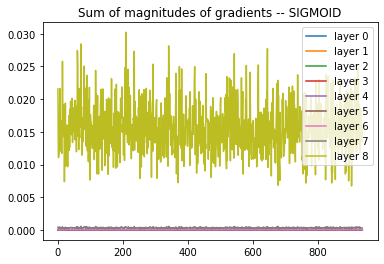


Test set: Average loss: 2.3081, Accuracy: 1028/10000 (10.28%)

<<<<<<< RELU <<<<<<<
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300946
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.302267
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.304310
Train Epoch: 1 [19200/60000 (32%)]	Loss: 2.294024
Train Epoch: 1 [25600/60000 (43%)]	Loss: 2.303435
Train Epoch: 1 [32000/60000 (53%)]	Loss: 2.300169
Train Epoch: 1 [38400/60000 (64%)]	Loss: 2.307094
Train Epoch: 1 [44800/60000 (75%)]	Loss: 2.304153
Train Epoch: 1 [51200/60000 (85%)]	Loss: 2.306088
Train Epoch: 1 [57600/60000 (96%)]	Loss: 2.303592


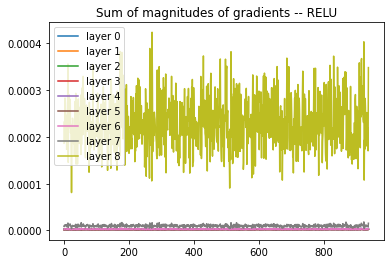


Test set: Average loss: 2.3005, Accuracy: 1135/10000 (11.35%)

<<<<<<< SELU <<<<<<<
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303109
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.572848
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.442610
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.262184
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.297157
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.300179
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.182376
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.479464
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.267091
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.244785


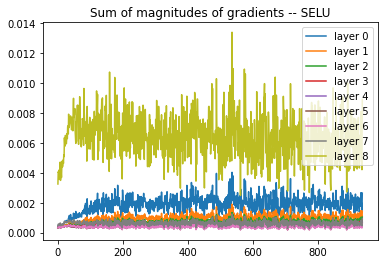


Test set: Average loss: 0.2499, Accuracy: 9254/10000 (92.54%)



In [9]:
# Main
print("<<<<<<< SIGMOID <<<<<<<")
model = ANN_sigmoid(input_dim, output_dim).to(device)
optimizer = optim.SGD(model.parameters(), lr=args.lr, 
                      momentum=args.momentum)

for epoch in range(1, args.epochs + 1):
    grads_lists = train(args, model, device, train_loader, optimizer, epoch)
    for layer_number, grads_list in enumerate(grads_lists):
        plt.plot(np.array(grads_list), label="layer {}".format(layer_number))
    plt.title('Sum of magnitudes of gradients -- SIGMOID')
    plt.legend()
    plt.show()
  
    test(args, model, device, test_loader)

del model    
print("<<<<<<< RELU <<<<<<<")
model = ANN_relu(input_dim, output_dim).to(device)
optimizer = optim.SGD(model.parameters(), lr=args.lr, 
                      momentum=args.momentum)

for epoch in range(1, args.epochs + 1):
    grads_lists = train(args, model, device, train_loader, optimizer, epoch)
    for layer_number, grads_list in enumerate(grads_lists):
        plt.plot(np.array(grads_list), label="layer {}".format(layer_number))
    plt.title('Sum of magnitudes of gradients -- RELU')
    plt.legend()
    plt.show()
    
    test(args, model, device, test_loader)
del model

# Main
print("<<<<<<< SELU <<<<<<<")
model = ANN_selu(input_dim, output_dim).to(device)
optimizer = optim.SGD(model.parameters(), lr=args.lr, 
                      momentum=args.momentum)

for epoch in range(1, args.epochs + 1):
    grads_lists = train(args, model, device, train_loader, optimizer, epoch)
    for layer_number, grads_list in enumerate(grads_lists):
        plt.plot(np.array(grads_list), label="layer {}".format(layer_number))
    plt.title('Sum of magnitudes of gradients -- SELU')
    plt.legend()
    plt.show()
  
    test(args, model, device, test_loader)

del model    